In [1]:
from SimPEG import *
import simpegDCIP as DC
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
cs = 2.
npad = 10
hx = [(cs,npad, -1.3),(cs,41),(cs,npad, 1.3)]
hy = [(cs,npad, -1.3),(cs,41),(cs,npad, 1.3)]
hz = [(cs,npad, -1.3),(cs,20)]
mesh = Mesh.TensorMesh([hx, hy, hz], 'CCN')

In [63]:
r = np.sqrt((mesh.gridCC**2).sum(axis=1))
radius = 15.
sphind  = r <radius
sigma = np.ones(mesh.nC)*1e-3
sigma[sphind] = 1e-8
sigmahalf = np.ones(mesh.nC)*1e-3

In [33]:
print mesh

  ---- 3-D TensorMesh ----  
   x0: -151.81
   y0: -151.81
   z0: -150.81
  nCx: 61
  nCy: 61
  nCz: 30
   hx: 27.57, 21.21, 16.31, 12.55, 9.65, 7.43, 5.71, 4.39, 3.38, 2.60, 41*2.00, 2.60, 3.38, 4.39, 5.71, 7.43, 9.65, 12.55, 16.31, 21.21, 27.57
   hy: 27.57, 21.21, 16.31, 12.55, 9.65, 7.43, 5.71, 4.39, 3.38, 2.60, 41*2.00, 2.60, 3.38, 4.39, 5.71, 7.43, 9.65, 12.55, 16.31, 21.21, 27.57
   hz: 27.57, 21.21, 16.31, 12.55, 9.65, 7.43, 5.71, 4.39, 3.38, 2.60, 20*2.00


(<matplotlib.collections.QuadMesh at 0x10eb0ef10>,)

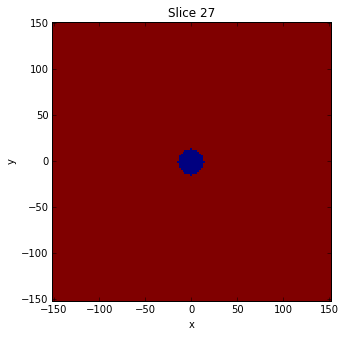

In [34]:
figsize(5,5)
mesh.plotSlice(sigma, normal='Z', ind = 27, grid=False)

In [35]:
xr = np.linspace(-30, 30, 21)

In [47]:
XYZrx = Utils.ndgrid(xr, xr, np.r_[-1.])
XYZMrx = Utils.ndgrid(xr-0.5, xr, np.r_[-1.])
XYZNrx = Utils.ndgrid(xr+0.5, xr, np.r_[-1.])
trxlocA = np.r_[-30, 0., -1.]
trxlocB = np.r_[30, 0., -1.]

In [48]:
rx = DC.RxDipole(XYZMrx, XYZNrx)
tx = DC.SrcDipole([rx], trxlocA, trxlocB)
survey = DC.SurveyDC([tx])
problem = DC.ProblemDC_CC(mesh)
problem.pair(survey)
try:
    from pymatsolver import MumpsSolver
    problem.Solver = MumpsSolver
except Exception, e:
    problem.Solver = SolverLU    

In [49]:
data = survey.dpred(sigma)

In [50]:
X = XYZrx[:,0].reshape((21,21), order='F')
Y = XYZrx[:,1].reshape((21,21), order='F')
DATA = data.reshape((21,21), order='F')

<matplotlib.contour.QuadContourSet instance at 0x10be8cab8>

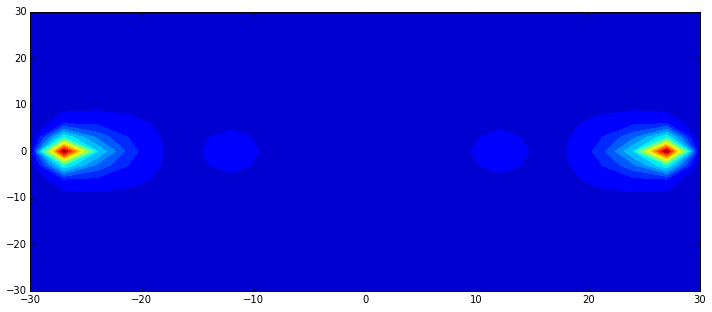

In [51]:
plt.contourf(X, Y, DATA, 20)

In [91]:
field = problem.fields(sigma)

In [92]:
phi = field[tx, "phi_sol"]
# phihalf = fieldhalf[tx, "phi_sol"]

In [93]:
e = field._e(phi, [tx])
j = field._j(phi, [tx])
# ehalf = fieldhalf._e(phihalf, [tx])
# jhalf = fieldhalf._j(phihalf, [tx])

In [94]:
xyzlim=np.vstack((np.r_[-50, 50], np.r_[-50, 50], np.r_[-30, 0]))
actind, meshact = Utils.meshutils.ExtractCoreMesh(xyzlim, mesh)

(-60, 0)

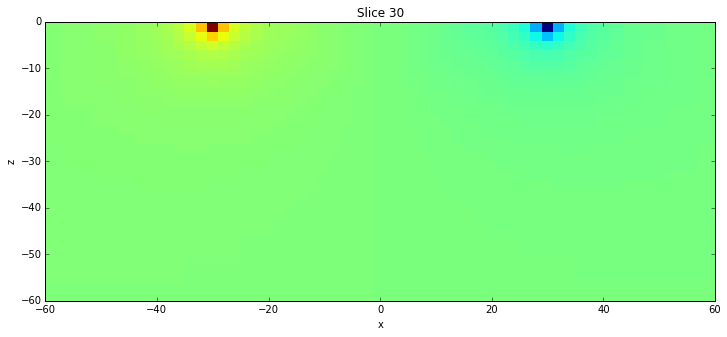

In [95]:
figsize(12, 5)
mesh.plotSlice(phi, normal='Y')
xlim(-60, 60)
ylim(-60, 0)

(-60, 0)

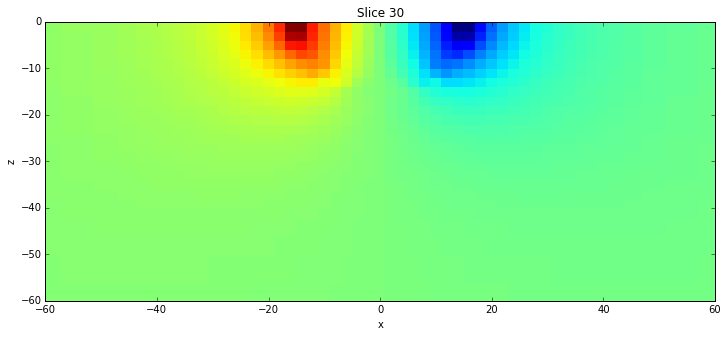

In [96]:
figsize(12, 5)
mesh.plotSlice(phi-phihalf, normal='Y')
xlim(-60, 60)
ylim(-60, 0)

(-60, 0)

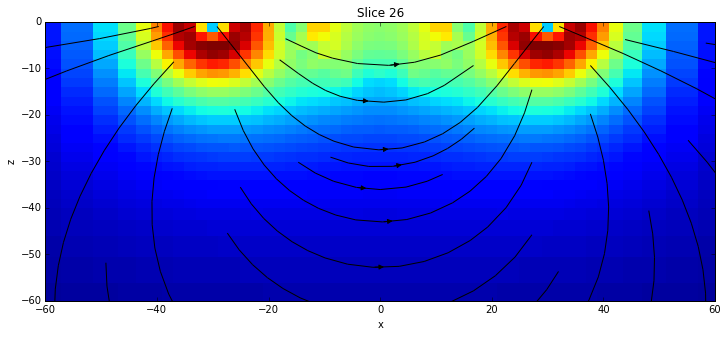

In [97]:
figsize(12, 5)
mesh.plotSlice(e, vType="F", view='vec', ind = 26, normal='Y')
xlim(-60, 60)
ylim(-60, 0)

(-60, 0)

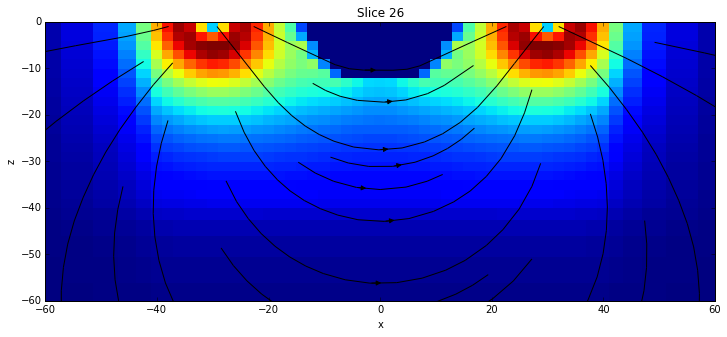

In [98]:
figsize(12, 5)
mesh.plotSlice(j, vType="F", view='vec', ind = 26, normal='Y')
xlim(-60, 60)
ylim(-60, 0)